In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, BatchNormalization
from tensorflow.keras.layers import ReLU, AvgPool2D, Flatten, Dense
import PIL
from PIL import ImageOps
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

# workstation used
ans = input('self or lab: ')
if ans == 'self':
    idi = '/home/neo11/Documents'
    print('using neo11')
else:
    idi = '/home/melcher/Documents/Nihal'
    print('using melcher')

2022-07-28 09:38:36.695575: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


self or lab: self
using neo11


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7862131336978742400
xla_global_id: -1
]


2022-07-27 08:04:51.614050: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-27 08:04:57.177365: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-27 08:04:57.177411: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (neo11-Inspiron-5402): /proc/driver/nvidia/version does not exist


In [ ]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("Num CPUs Available: ", len(tf.config.list_physical_devices('CPU')))

Num GPUs Available:  0
Num CPUs Available:  1


In [4]:
image_size = (128 ,128)
batch_size = 32

dataset_path = idi + '/ML in microfluids/svd_dataset2/train' # '/content/drive/MyDrive/ML in microfluids/trd'
testing_path = idi + '/ML in microfluids/svd_dataset2/test' # '/content/drive/MyDrive/ML in microfluids/cvd'

# data generator
train_datagen =ImageDataGenerator(rescale = 1/255, validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'training',
    color_mode = 'grayscale'
)

validation_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'validation',
    color_mode = 'grayscale'
)

test_batches = test_datagen.flow_from_directory(
    testing_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary',
    color_mode = 'grayscale'
)

Found 548 images belonging to 2 classes.
Found 137 images belonging to 2 classes.
Found 345 images belonging to 2 classes.


In [5]:
# load model 21_layer trained with only SVD images
model2 = keras.models.load_model(idi + '/ML in microfluids/models trained/inception_2')
train_loss, train_accuracy = model2.evaluate(train_batches, steps=len(train_batches))
validation_loss, validation_accuracy = model2.evaluate(validation_batches, steps=len(validation_batches))
test_loss, test_accuracy = model2.evaluate(test_batches, steps=len(test_batches))

11/11 [==============================] - 6s 564ms/step - loss: 0.0203 - accuracy: 0.9942


In [16]:
# load model 16_layer trained with only grayscale images
model3 = keras.models.load_model(idi + '/ML in microfluids/models trained/14_layer')
#test_loss4, test_accuracy4 = model3.evaluate(test_batches_2, steps=len(test_batches_2))
#print("loss on new data set = {} and accuracy = {}".format(test_loss4,test_accuracy4))
train_loss, train_accuracy = model3.evaluate(train_batches, steps=len(train_batches))
validation_loss, validation_accuracy = model3.evaluate(validation_batches, steps=len(validation_batches))
test_loss, test_accuracy = model3.evaluate(test_batches, steps=len(test_batches))

7/7 [==============================] - 1s 170ms/step - loss: 1.2286 - accuracy: 0.6037


In [5]:
# load model 18_layer trained with only grayscale images
model4 = keras.models.load_model(idi + '/ML in microfluids/models trained/21_SVD')
# test_loss4, test_accuracy4 = model4.evaluate(test_batches_2, steps=len(test_batches_2))
# print("loss on new data set = {} and accuracy = {}".format(test_loss4,test_accuracy4))
train_loss, train_accuracy = model4.evaluate(train_batches, steps=len(train_batches))
validation_loss, validation_accuracy = model4.evaluate(validation_batches, steps=len(validation_batches))
test_loss, test_accuracy = model4.evaluate(test_batches, steps=len(test_batches))

2022-07-27 18:04:40.684341: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


11/11 [==============================] - 11s 979ms/step - loss: 0.0530 - accuracy: 0.9971


In [6]:
# identifier function
def identifier(array):
    l = []
    n= array.shape[0]
    for e in array:
        if e[0]== max(e):
            l.append('interested cell')
        else:
            l.append('complementary particle')
    return l  

In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL import Image
import matplotlib.image as mpimg

# image channel weights
r_c, g_c, b_c = 0.1, 2, 2
d = r_c + g_c + b_c

# for which set on image testing to be done
img_dir = '/home/neo11/Documents/ML in microfluids/dataset/test/cell'
save_dir = '/home/neo11/Documents/ML in microfluids/converted/test/cell'
j = 0
l = []
for i in os.listdir(img_dir):
    img = image.load_img(img_dir +'/' + i)
    arr = np.array(img)
    r, g, b = arr[:,:,0], arr[:,:,1], arr[:,:,2]
    a = (r_c*r + g_c*g + b_c*b)/d
    c = np.reshape(a,(128,128))
    l.append(a)
    matplotlib.image.imsave(os.path.join(save_dir , "c" +str(i)),c, cmap ='gray')

2022-07-10 19:26:11.355546: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


NameError: name 'image' is not defined

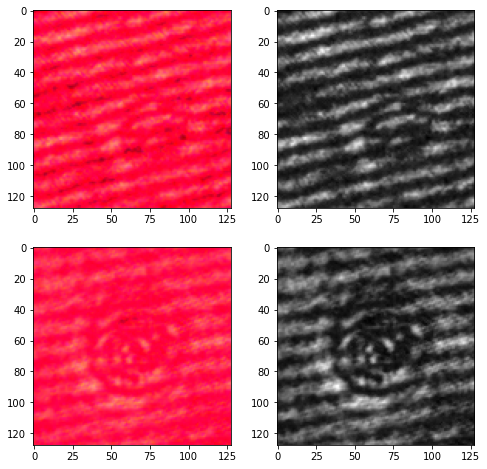

In [5]:
# red chanell = 0.2, green and blue = 1
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

# weights of the corresponding color channels
r_c, g_c, b_c = 0.1, 2, 1

ii = imread("train_cell.png")
r, g, b = ii[:,:,0], ii[:,:,1], ii[:,:,2]

ii2 = imread("train_comp.png")
r2, g2, b2 = ii2[:,:,0], ii2[:,:,1], ii2[:,:,2]

greyscale_img1 = (r_c*r + g_c*g + b_c*b)
greyscale_img2 = (r_c*r2 + g_c*g2 + b_c*b2)

img_list = [ii, greyscale_img1, ii2, greyscale_img2]

fig = plt.figure(figsize=(8, 8))
columns = 2
rows = 2
for i in range(columns*rows):
    img = img_list[i]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img, cmap = 'gray')
plt.show()

In [6]:
print(train_batches.class_indices)
print(test_batches.class_indices)

{'Cell': 0, 'comp': 1}
{'cell': 0, 'comp': 1}


In [3]:
class classifier():
    def __init__(self, di, model_used):
        self.di = di
        self.model_used = model_used
        self.arr = []
        self.model =keras.models.load_model(idi + '/ML in microfluids/models trained/' + str(self.model_used))
        self.j = 0
        for i in os.listdir(self.di):
            img = image.load_img(self.di + '/' + i)
            img_arr = np.array(img)
            a = np.mean(img_arr, -1)
            a = a/255
            self.arr.append(a)
            
        self.arr = np.array(self.arr)
        self.pred = self.model(self.arr)
        print('images fed into model')
    
    def predictions(self):
        return self.pred
    
    def identifier_multiclass(self):
        self.identify = []
        for e in self.pred:
            if e[1] == max(e):
                self.identify.append('complementary particle')
            else:
                self.identify.append('interested cell')
        return self.identify
    
    def identifier_binary(self):
        self.identify = []
        for e in self.pred:
            if e > 0.5:
                self.identify.append('complementary particle')
            else:
                self.identify.append('interested cell')
        return self.identify
    
    def pred_confidance(self):
        self.prob = []
        for e in self.pred:
            self.prob.append(max(e)/(sum(e)))
        return np.array(self.prob)
    
    def pred_error(self):
        self.error = []
        self.j = 0
        val = input('directory for cell or comp? : ')
        if val[1] == 'e': # cell or Cell
            for e in self.pred:
                self.j += 1
                if e[1] == max(e):
                    self.error.append(str(self.j))
            print('comp identified as cell at indices = ')
            return self.error
        else:
            for e in self.pred:
                self.j += 1
                if e[0] == max(e):
                    self.error.append(str(self.j))
            print('comp identified as cell at indices = ')
            return self.error

In [17]:
d1 = '/home/neo11/Documents/ML in microfluids/main dataset/svd_compiled/test/comp'
name = 'inception_random'

a = classifier(d1, name)

images fed into model


In [18]:
a.identifier_multiclass()

['complementary particle',
 'complementary particle',
 'complementary particle',
 'interested cell',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'complementary particle',
 'comple

In [19]:
error = a.pred_error()
print(error)

directory for cell or comp? : comp
comp identified as cell at indices = 
['4', '94']


In [20]:
print('wrong predictions = {}/{}'.format(len(error), len(a.identifier_multiclass())))

wrong predictions = 2/157


In [79]:
s = np.std(a.pred_confidance())
cl = 0.8
abs((a.pred_confidance() - cl)/s)

array([5.7904754 , 5.8029885 , 5.8547144 , 5.8140182 , 5.8211064 ,
       5.6470537 , 5.857241  , 5.852295  , 5.7923675 , 5.853993  ,
       5.8041224 , 5.544145  , 5.65938   , 5.3968096 , 5.805915  ,
       5.397051  , 5.8104906 , 5.453246  , 5.8533816 , 5.7881413 ,
       5.6231613 , 5.8529954 , 5.795137  , 5.752384  , 5.7001004 ,
       5.842224  , 5.5804996 , 5.804238  , 0.7786098 , 5.690727  ,
       5.8541884 , 5.79076   , 5.8550587 , 5.676832  , 5.6665835 ,
       5.738101  , 5.695773  , 5.8581457 , 5.8196335 , 5.8503504 ,
       5.813443  , 5.6760144 , 5.669398  , 5.8463054 , 5.8582945 ,
       5.512518  , 5.8520064 , 5.7478657 , 2.7906404 , 0.43444425,
       5.6724677 , 5.451193  , 5.539803  , 5.8006    , 5.627975  ,
       5.6659455 , 5.736216  , 5.6933513 , 5.852758  , 5.7705035 ,
       5.7914047 , 5.7999954 , 5.7261505 , 5.7389326 , 5.7916512 ,
       5.8196335 , 5.785552  , 5.74307   , 5.7998767 , 5.621741  ,
       5.8567257 , 5.7881885 , 5.7977295 , 5.5559435 , 5.78264

## total error = 4/451 test images (all errors in interested cell)
## model trained on 409 images

In [74]:
a1 = 217/218
a2 = 1
a3 = 147/148
f1 = 2*a2*a3/(a2+a3)
print('accuracy = ' + str(a1))
print('f1 score = ' + str(f1))

accuracy = 0.9954128440366973
f1 score = 0.9966101694915254
